In [1]:
#Importing the libraries in the notebook.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#Loading the dataset into dataframe.
df_product = pd.read_csv("../Datasets_Project/amz_uk_price_prediction_dataset.csv")
display(df_product)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df_product = df_product[df_product.columns[df_product.isnull().mean() < 0.8]]

#### Part 1: Analyzing Best-Seller Trends Across Product Categories.
- Objective: Understand the relationship between product categories and their best-seller status.

- Crosstab Analysis:

- Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?

- Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [4]:
# Generating a crosstab for 'MSZoning' and 'SaleCondition'
crosstab_result = pd.crosstab(df_product['category'], df_product['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
# Group the data by category
category_group = df_product.groupby('category')
# Count the total number of products per category
total_products_per_category = category_group['uid'].count()
# Count the number of best-sellers per category
best_sellers_per_category = category_group['isBestSeller'].sum()
# Calculate the proportion of best-sellers for each category
proportion_best_sellers = best_sellers_per_category / total_products_per_category
# Combine the results into a DataFrame for easier viewing
proportion_best_sellers_df = pd.DataFrame({
    'Total Products': total_products_per_category,
    'Best-Sellers': best_sellers_per_category,
    'Proportion of Best-Sellers': proportion_best_sellers
}).sort_values(by='Proportion of Best-Sellers', ascending=False)

display(proportion_best_sellers_df)
 

,Total Products,Best-Sellers,Proportion of Best-Sellers
category,,,
Grocery,9564,556,0.058135
Smart Home Security & Lighting,104,6,0.057692
Health & Personal Care,9569,552,0.057686
Mobile Phone Accessories,259,11,0.042471
Power & Hand Tools,8659,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [6]:
from scipy.stats import chi2_contingency

# Chi-square test for 'Product_Category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

- Reject the null hypothesis: There is strong evidence to suggest that the variables you are testing are not independent and are significantly associated with each other.

In [7]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

- The Cramér's V value of 0.122 suggests a weak association between the two variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

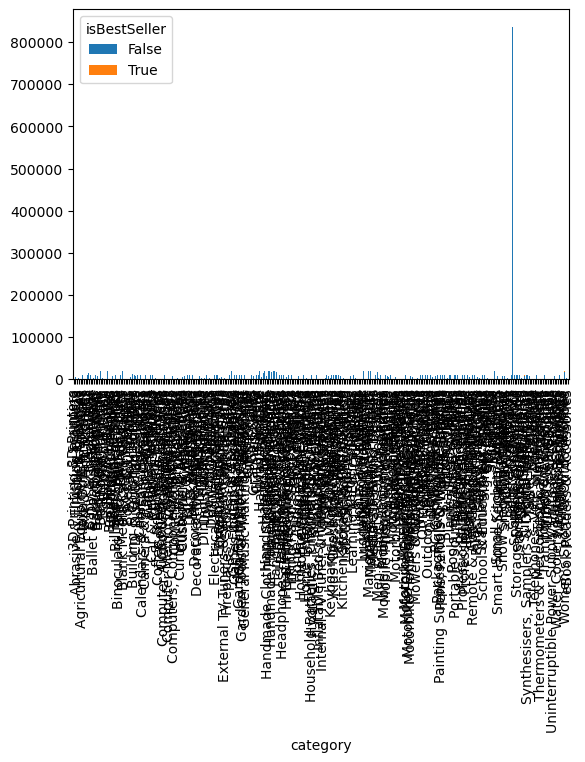

In [16]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind='bar', stacked=True);



#### Part2: Exploring Product Prices and Ratings Across Categories and Brands
- Objective: Investigate how different product categories influence product prices.
- Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [23]:
# Calculate Q1, Q3, IQR, and whiskers for outlier detection
Q3 = df_product['price'].quantile(0.75)
Q1 = df_product['price'].quantile(0.25)
IQR = Q3 - Q1
lower_wisker = Q1 - 1.5 * IQR
upper_wisker = Q3 + 1.5 * IQR

# Get the indexes of outliers
lower_outliers_indexes = df_product[df_product['price'] < lower_wisker].index
upper_outliers_indexes = df_product[df_product['price'] > upper_wisker].index

# Print the whisker values
print(f"Lower Whisker: {lower_wisker}, Upper Whisker: {upper_wisker}")

# Print the number of outliers detected
print(f"Lower outliers count: {len(lower_outliers_indexes)}")
print(f"Upper outliers count: {len(upper_outliers_indexes)}")

# Replace the value of the upper outliers with the value of the upper whisker
df_product.loc[lower_outliers_indexes, 'price'] = lower_wisker
df_product.loc[upper_outliers_indexes, 'price'] = upper_wisker

# Print a summary of the price column after replacement
print("Price column statistics after replacing outliers:")
display(df_product['price'].describe())

# Optionally, show a few rows of the modified DataFrame to confirm the changes
display(df_product[['price']].head())

Lower Whisker: -44.01, Upper Whisker: 99.99000000000001
Lower outliers count: 0
Upper outliers count: 0
Price column statistics after replacing outliers:


count    2.443651e+06
mean     3.367770e+01
std      3.233202e+01
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      9.999000e+01
Name: price, dtype: float64

,price
0,21.99
1,23.99
2,21.99
3,31.99
4,17.99


#### Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.

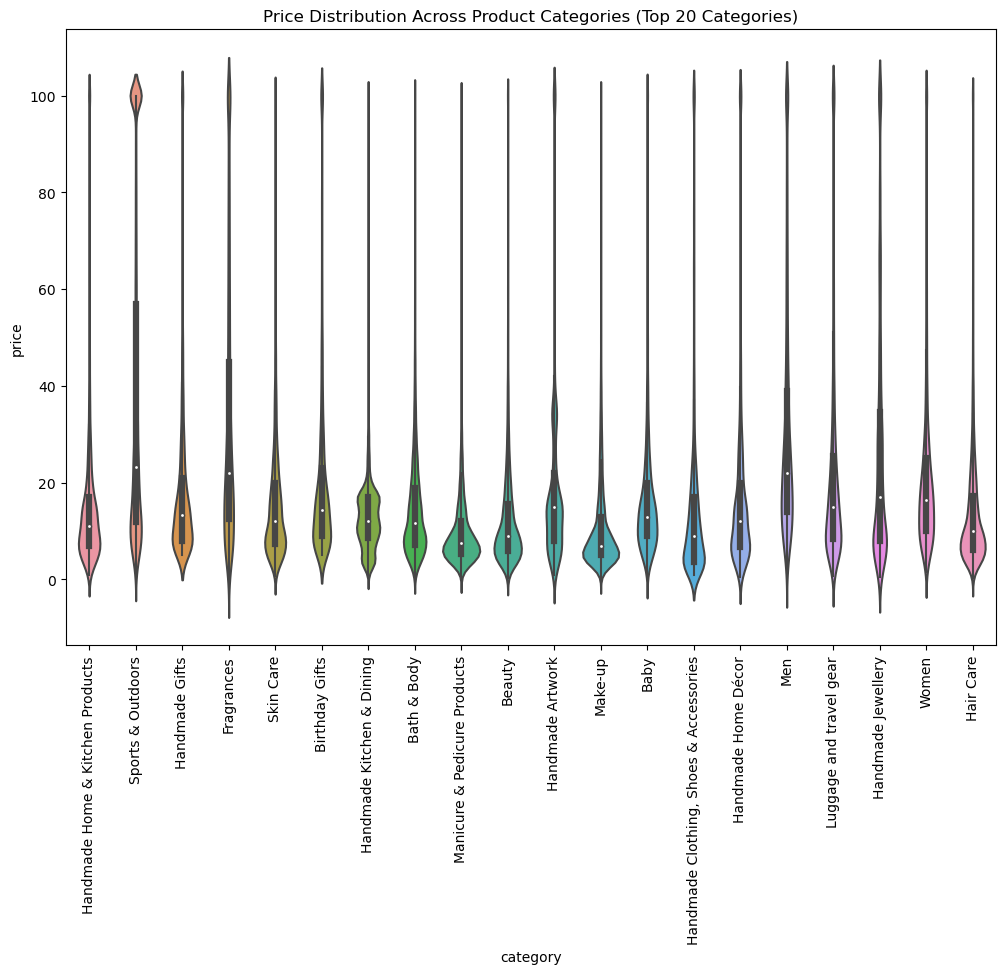

category
3D Printers                            99.99
Motorbike Exhaust & Exhaust Systems    99.99
Binoculars, Telescopes & Optics        99.99
Home Entertainment                     99.99
Projectors                             99.99
                                       ...  
Adapters                                7.05
Make-up                                 7.00
Signs & Plaques                         6.99
Arts & Crafts                           5.99
Office Paper Products                   4.38
Name: price, Length: 296, dtype: float64


In [24]:
# Count the occurrences of each category and filter for the top 20
top_categories = df_product['category'].value_counts().nlargest(20).index
filtered_df = df_product[df_product['category'].isin(top_categories)]
# Create the violin plot for price across categories
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Product Categories (Top 20 Categories)')
plt.show()

# Analyze the category with the highest median price without filtering by top categories
median_prices = df_product.groupby('category')['price'].median().sort_values(ascending=False)

print(median_prices)

#### Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.

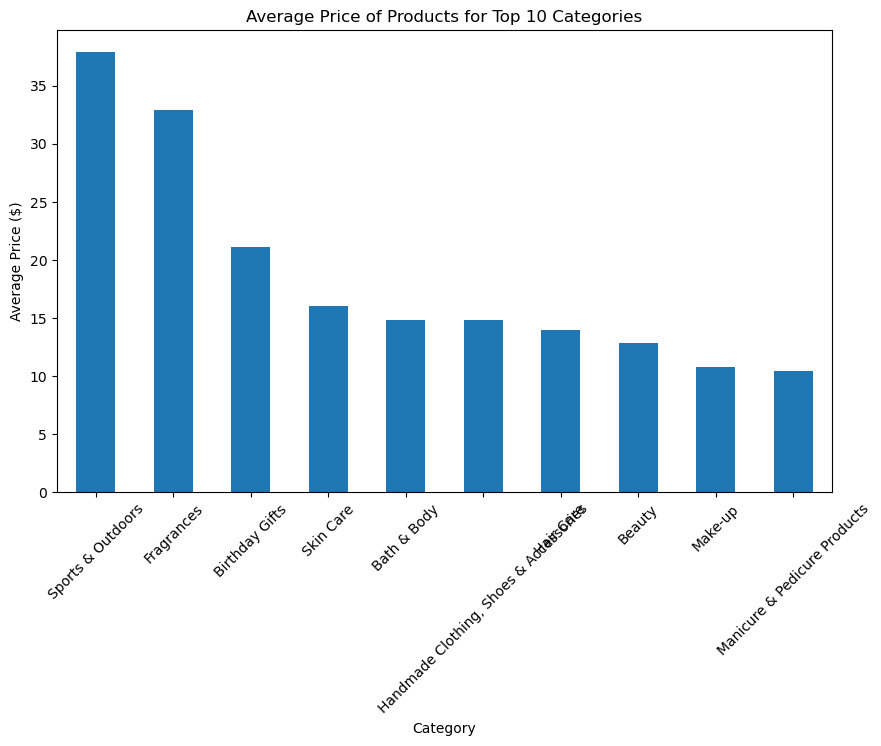

category
Laptops                                99.429966
Desktop PCs                            99.234141
3D Printers                            93.566573
Motorbike Exhaust & Exhaust Systems    93.127946
Graphics Cards                         92.003936
                                         ...    
Bedding Accessories                     8.835220
Adapters                                8.750197
Signs & Plaques                         8.262641
Arts & Crafts                           8.112501
Office Paper Products                   6.937789
Name: price, Length: 296, dtype: float64

In [27]:
# Calculate the top 10 product categories based on count
top_10_categories = df_product['category'].value_counts().nlargest(10).index
top_10_df = df_product[df_product['category'].isin(top_10_categories)]

# Calculate the average price for each of the top 10 categories
avg_price_top_10 = top_10_df.groupby('category')['price'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the average price for the top 10 categories
plt.figure(figsize=(10, 6))
avg_price_top_10.plot(kind='bar')
plt.title('Average Price of Products for Top 10 Categories')
plt.ylabel('Average Price ($)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Analyze the category with the highest average price without filtering by top categories
avg_prices = df_product.groupby('category')['price'].mean().sort_values(ascending=False)

display(avg_prices)


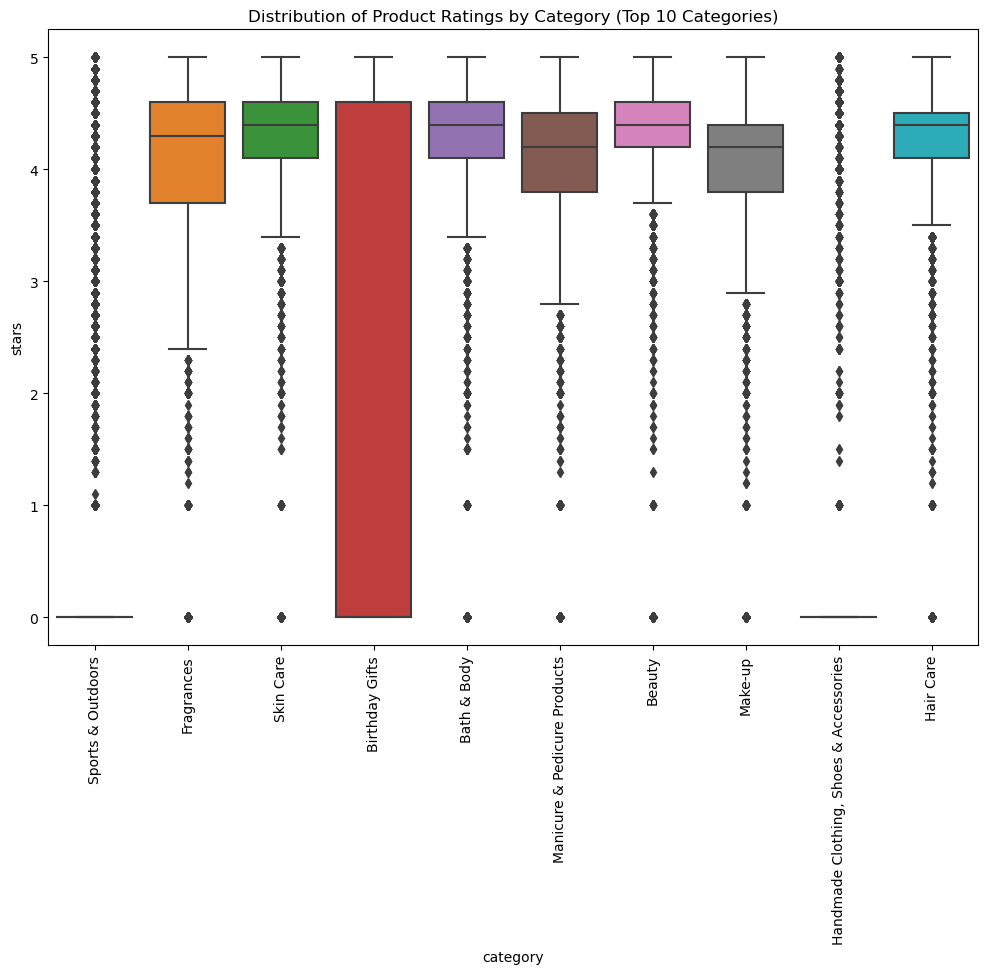

category
Computer Memory                4.7
Hobbies                        4.6
Beer, Wine & Spirits           4.6
Laptop Accessories             4.6
Kids' Play Figures             4.6
                              ... 
KVM Switches                   0.0
Karaoke Equipment              0.0
Lab & Scientific Products      0.0
Laptops                        0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

In [28]:
# Filter the top 10 categories based on count
top_10_categories_ratings = df_product['category'].value_counts().nlargest(10).index
filtered_ratings_df = df_product[df_product['category'].isin(top_10_categories_ratings)]

# Create a box plot to visualize the distribution of product ratings based on category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filtered_ratings_df)
plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings by Category (Top 10 Categories)')
plt.show()

# Calculate the median rating for each category without filtering by top categories
median_ratings = df_product.groupby('category')['stars'].median().sort_values(ascending=False)

display(median_ratings)

#### Part 3: Investigating the Interplay Between Product Prices and Ratings

- Objective: Analyze how product ratings (stars) correlate with product prices.
- Correlation Coefficients:
  Calculate the correlation coefficient between price and stars.
  Is there a significant correlation between product price and its rating?

In [30]:
#correlation between ratings and prices.
correlation_coefficient = df_product['price'].corr(df_product['reviews'])

# Print the correlation coefficient
print("Correlation Coefficient between Price and Stars:", correlation_coefficient)

Correlation Coefficient between Price and Stars: -0.018660581808974855


#### Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.


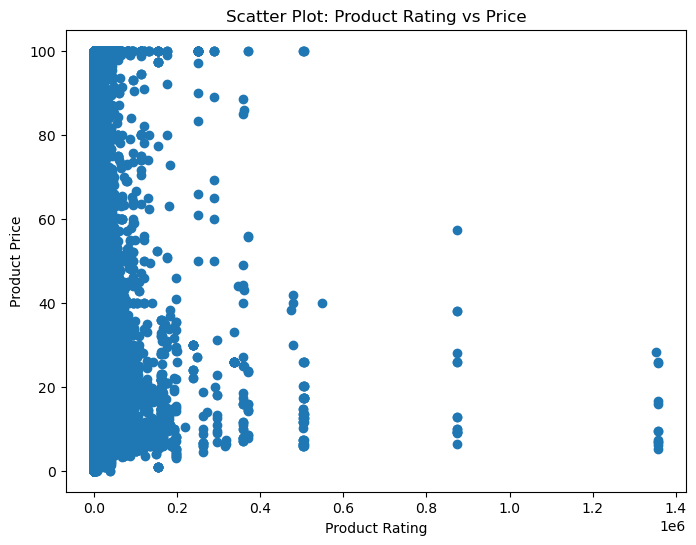

In [32]:
# Scatter plot to visualize the relationship between product rating and price
plt.figure(figsize=(8, 6))
plt.scatter(df_product['reviews'], df_product['price'])
plt.title('Scatter Plot: Product Rating vs Price')
plt.xlabel('Product Rating')
plt.ylabel('Product Price')
plt.show()

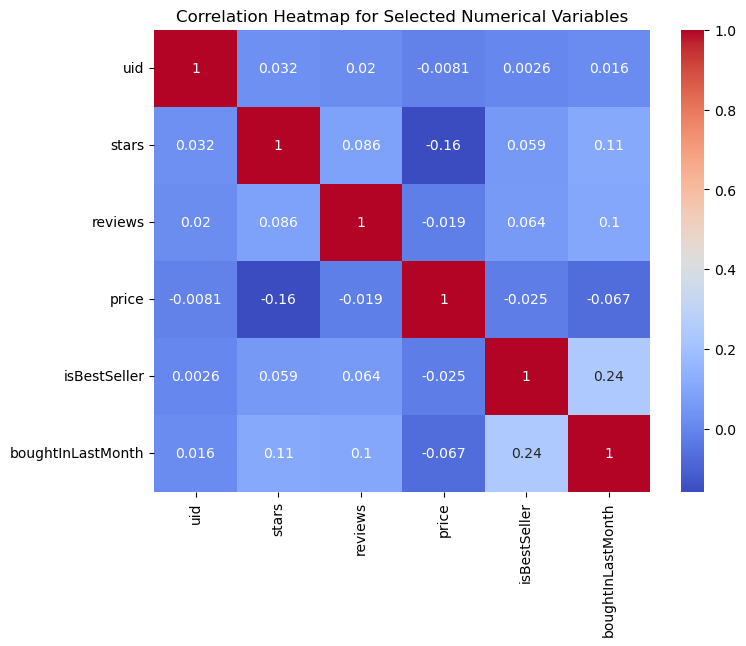

In [37]:
correlation_matrix = df_product.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

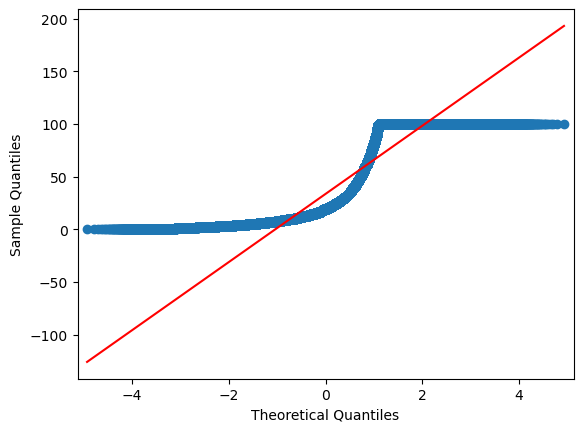

In [39]:
# QQ plot to examine if product prices follow a normal distribution
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_product['price'], line='s');
